# The steps going to be followed for this excercise
1. Reading, understanding and visualising the data.
2. Preparing the data for Modeling
3. Training the model
4. Residual Analysis
5. Prediction and evaluation

# 1. Reading, Understanding and Visualising the data

In [1]:
#Import all the libraries
#importing the libraries
import numpy as np
from numpy import sqrt 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
Bike = pd.read_csv('C:\\Users\\sanga\\OneDrive\\Desktop\\Upgrad\Multiple linear Regression Assignment\\day.csv')
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
Bike.shape

(730, 16)

Conclusion: This data has 730 rows and 16 columns

In [4]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking for missing values
Bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Conclusion: There are no missing values in the data set provided.

In [7]:
#Checking for duplicates:
Bike_dup=Bike
Bike_dup.drop_duplicates(subset=None, inplace=True)
Bike_dup.shape

(730, 16)

Conclusion: After checking and removing the duplicates it find that there is no duplicate values available in the provided data set.

In [8]:
Bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
Bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
Bike.shape

(730, 12)

Changing the categorical Columns season, mnth, weathersit, weekday

In [10]:
#Changing season
Bike.season.replace((1,2,3,4), ('W1_Spring', 'W2_Summer', 'W3_Fall', 'W4_Winter'), inplace=True)
Bike.season.value_counts(normalize=True)

W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: season, dtype: float64

In [11]:
#Changing month
Bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace=True)
Bike.mnth.value_counts(normalize=True)

Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [12]:
#Changing weather
Bike.weathersit.replace((1,2,3,4), ('Clear', 'Misty', 'Light Rain', 'Heavy Rain'), inplace=True)
Bike.weathersit.value_counts(normalize=True)

Clear         0.634247
Misty         0.336986
Light Rain    0.028767
Name: weathersit, dtype: float64

In [13]:
#Changing weekday
Bike.weekday.replace((0,1,2,3,4,5,6), ('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'), inplace=True)
Bike.weekday.value_counts(normalize=True)

Sat    0.143836
Sun    0.143836
Mon    0.143836
Tue    0.142466
Thu    0.142466
Fri    0.142466
Wed    0.141096
Name: weekday, dtype: float64

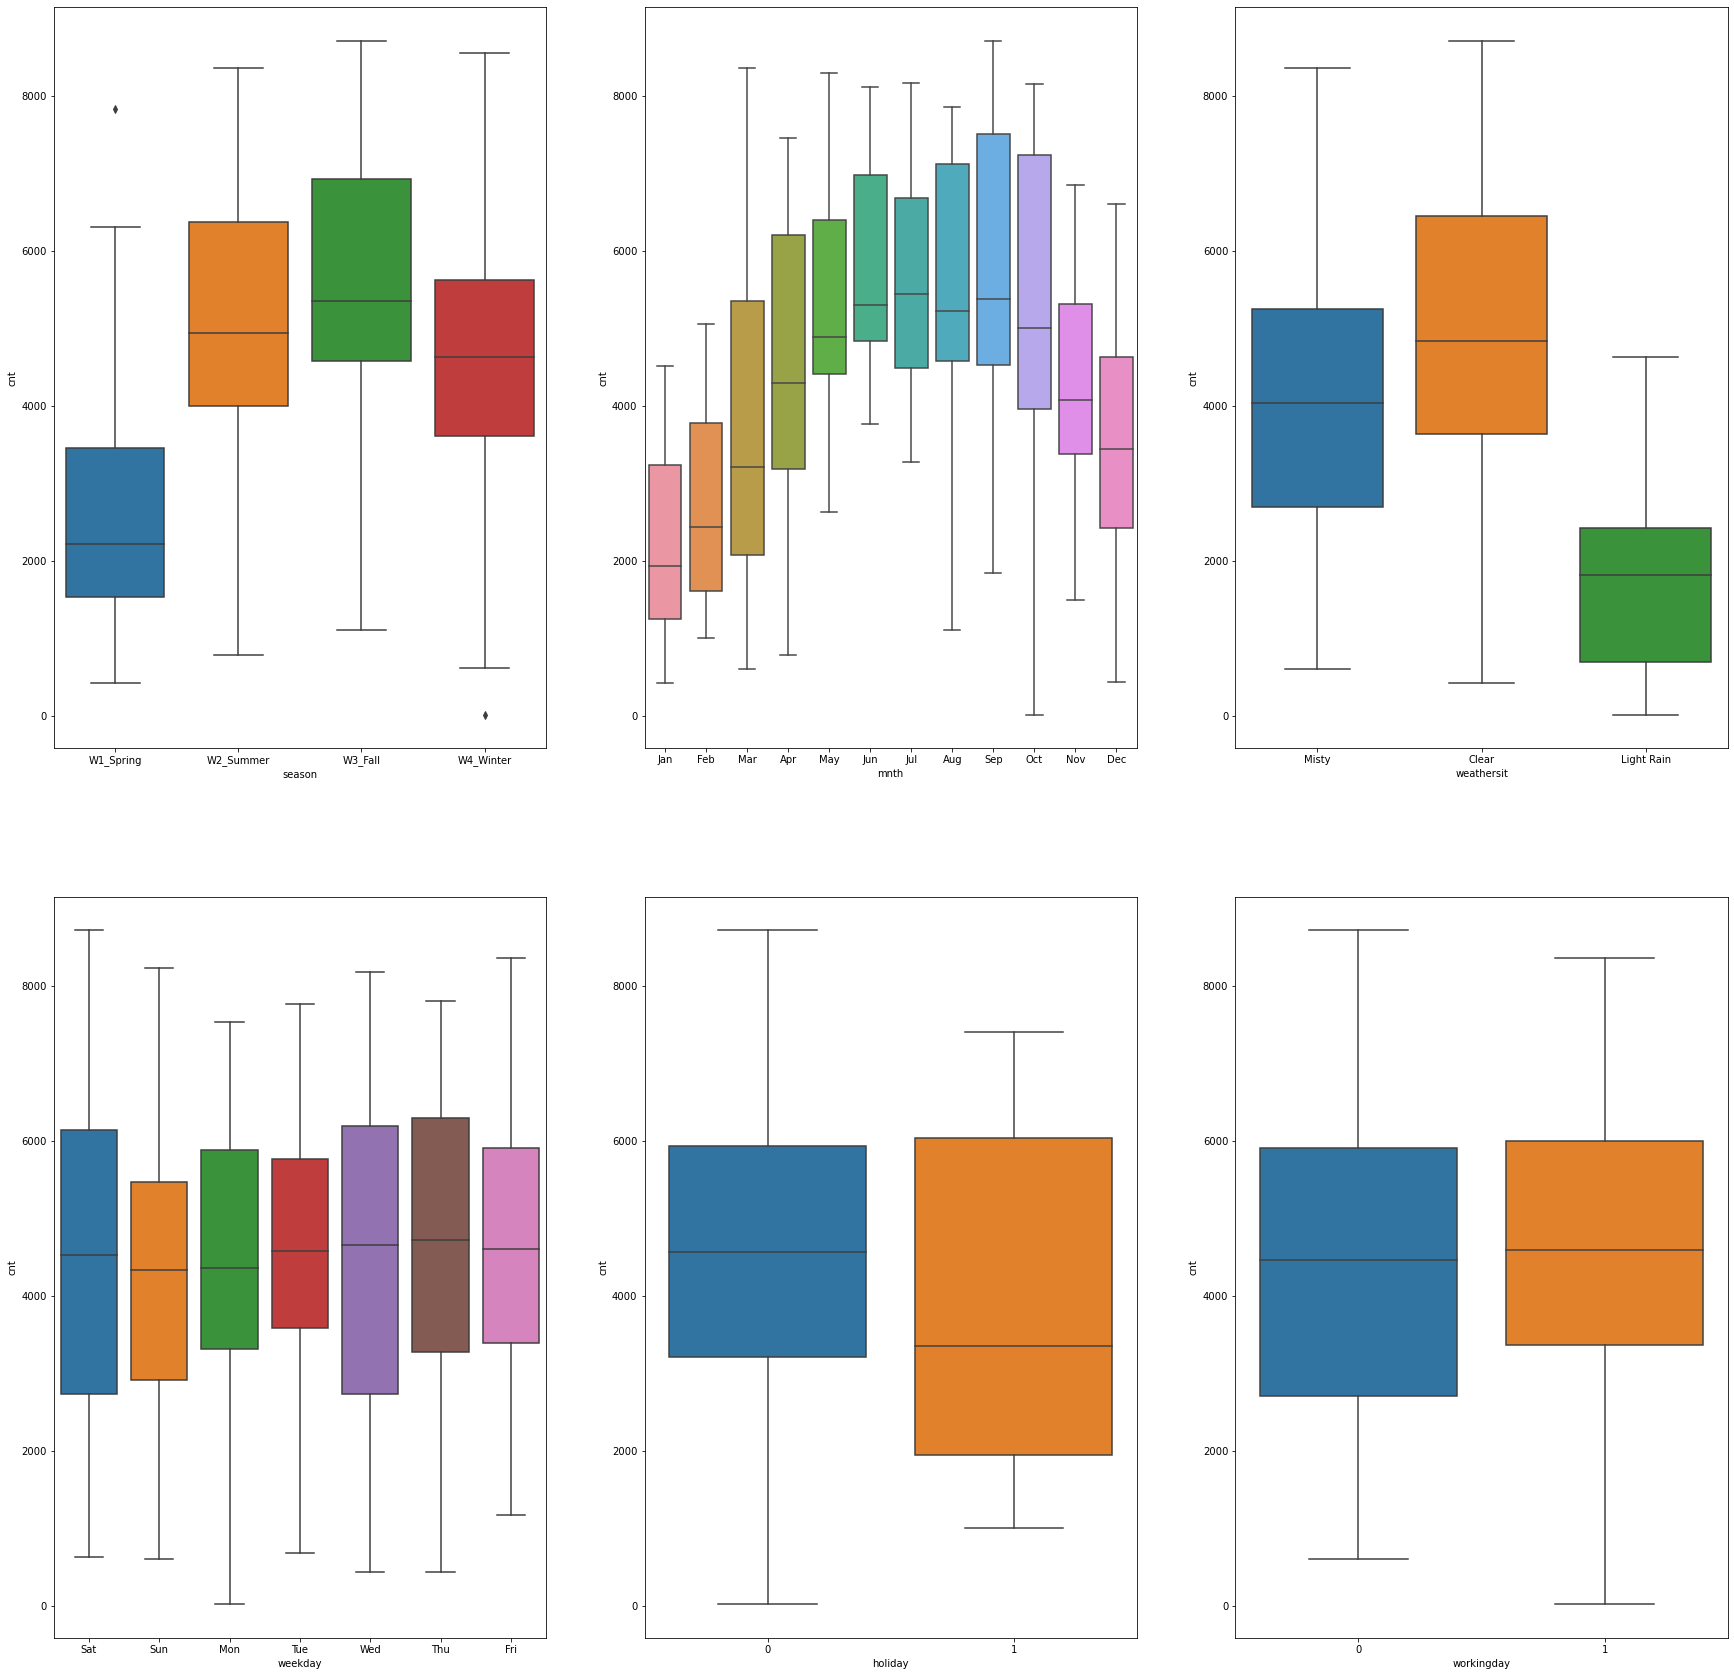

In [14]:
#Building boxplot of all categorical variables against the target variable count (cnt).
plt.figure(figsize=(30, 30))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike)
plt.show()

In [15]:
#deifing Categorical Status for Categorical values
def categorical_stats(col):
    cat_df = Bike.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/Bike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/Bike.cnt.count()*100
    return round(cat_df,2)

In [16]:
#function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=Bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=Bike, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

In [17]:
#Season
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
W3_Fall,1061129,5644.30,188,32.24,25.75
W2_Summer,918589,4992.33,184,27.91,25.21
W4_Winter,841613,4728.16,178,25.57,24.38
W1_Spring,469514,2608.41,180,14.27,24.66


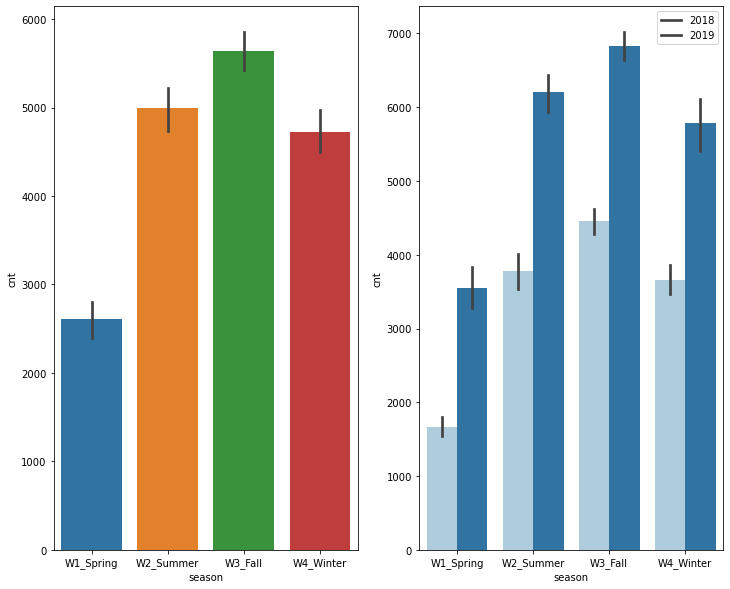

In [18]:
categorical_plot('season', 12,10)

Conclusion:From above data we can say approx. 32% of rental bike booking will happen during fall season with over 5000 booking, followed by summer with approx 28%, winter with approx. 25.57% and least booking is happeing during spring with approx. 14.27% booking. We can say season is good predictor of the independent variable.

In [19]:
#Changing Month
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


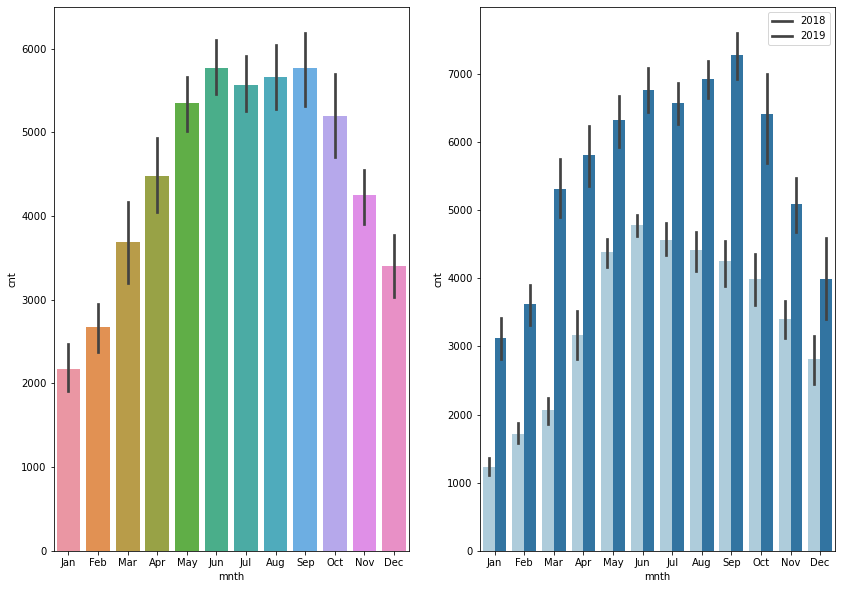

In [20]:
categorical_plot('mnth',14,10)

Conclusion: From above data we can say more than 10% of rental bike booking will happen during May thru Sep with booking of more than 5000 bookings. We can say season is good predictor of the independent variable.

In [21]:
#Changing Weather
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light Rain,37869,1803.29,21,1.15,2.88


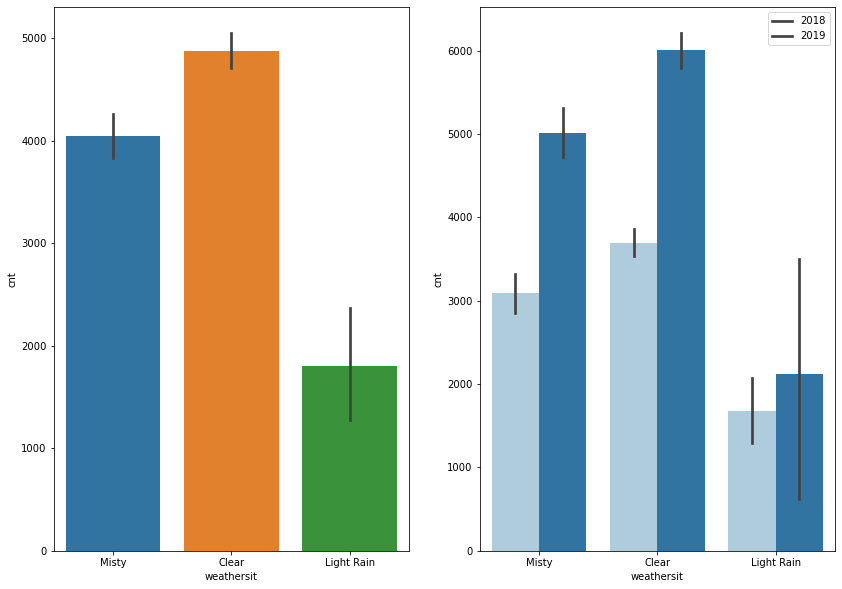

In [22]:
categorical_plot('weathersit', 14,10)

Conclusion: From above data we can say clear weathersit gets more than 68% of rental bike booking with more than 5000 bookings. We can say season is good predictor of the independent variable.This indicates that weathersit has some impact on bike rental bookings. Hence it can also be good predictor for dependent variables.
Please note that Heavy_rain data is not available in the provided data set.

In [23]:
#Changing weekday
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Fri,487790,4690.29,104,14.82,14.25
Thu,485395,4667.26,104,14.75,14.25
Sat,477807,4550.54,105,14.52,14.38
Wed,471214,4574.89,103,14.32,14.11
Tue,469109,4510.66,104,14.25,14.25
Mon,455503,4338.12,105,13.84,14.38
Sun,444027,4228.83,105,13.49,14.38


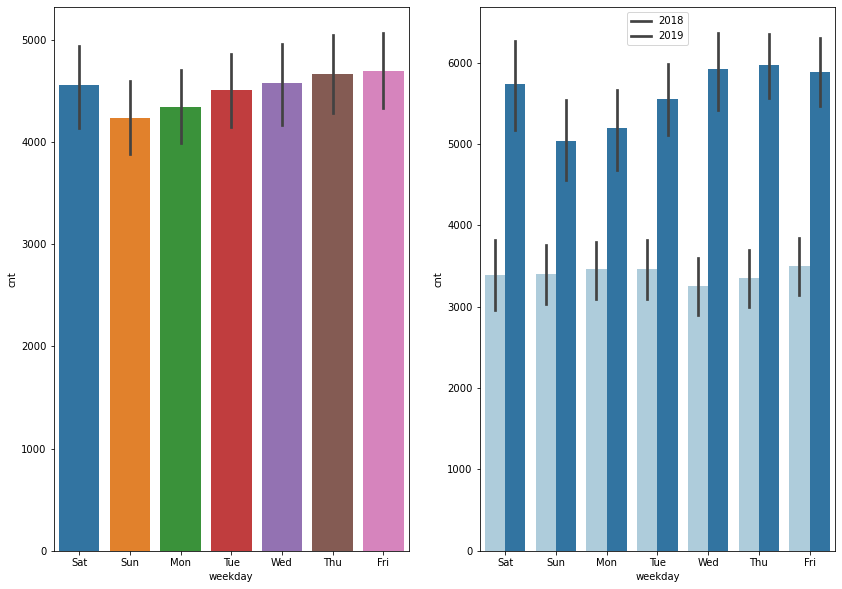

In [24]:
categorical_plot('weekday', 14,10)

Conclusion: From the above details we can say that weekdays shows very close relationship that is between 13.5%-14.8% with average booking of 4000-5000 bookings. This may have little influence but more analysis required.

In [25]:
#changing Holiday
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


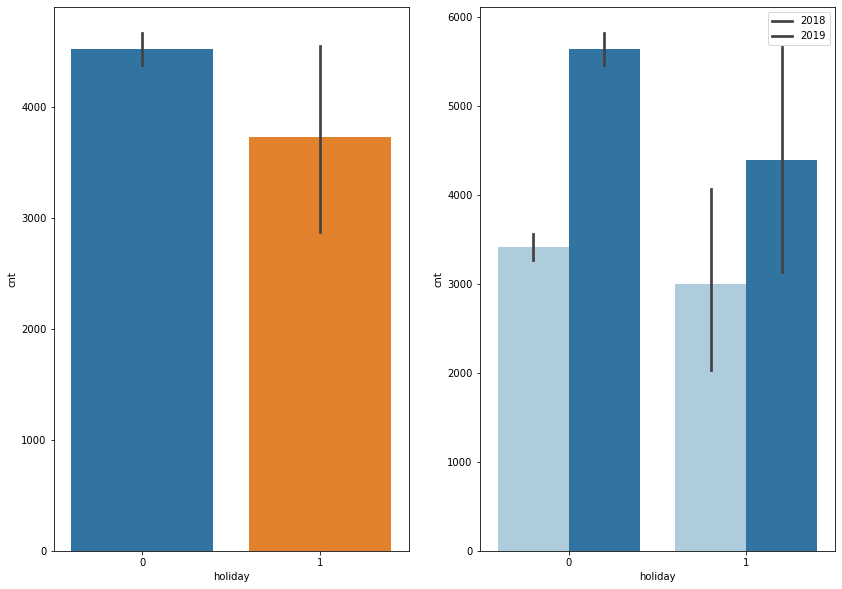

In [26]:
categorical_plot('holiday', 14, 10)

Conclusion: From above details we can say that more that 97% booking happened for rental bikes is no holiday time. Hence this can be a good predictor for dependent variables.

In [27]:
#Changing to working day
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


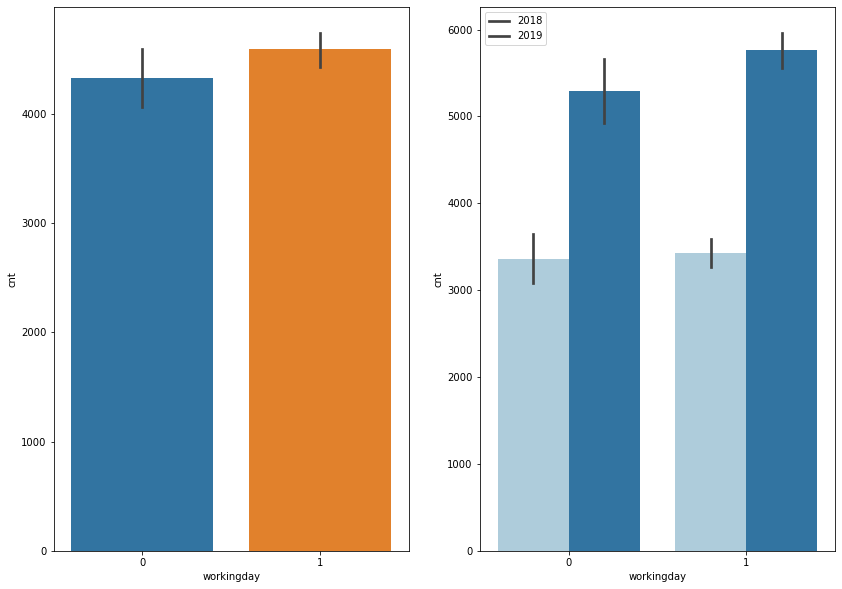

In [28]:
categorical_plot('workingday', 14, 10)

Conclusion: From above details we can say that more tha 69% booking happend for the rental bikes as happening during working days with approx. booking 5000 rental bikes. Hence this can be also a good predictor for dependent variables.

In [29]:
#Year
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


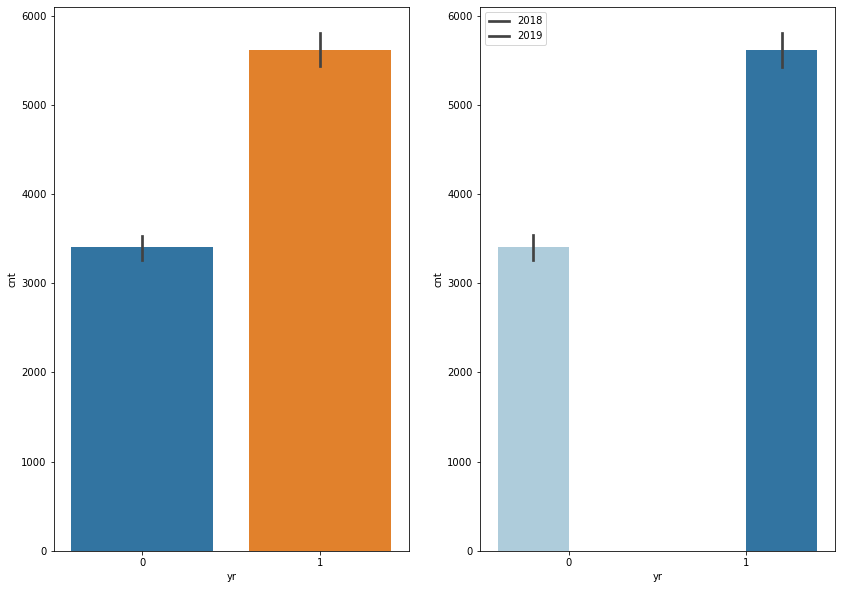

In [30]:
categorical_plot('yr', 14,10)

Conclusion:From above details we can say that in compare to 2018, 2019 has more than 62% bike has gone for rental.

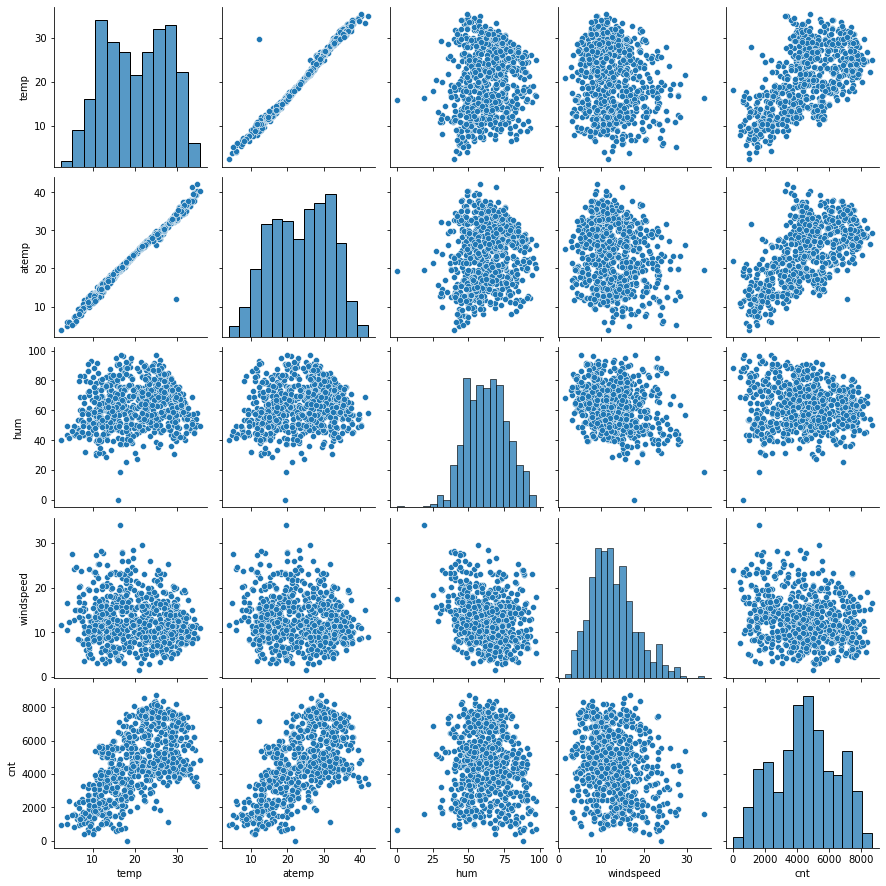

In [31]:
#Numerical Variable Analysis
#Verifying relationship between numerical variables
Bike_num = Bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(Bike_num)
plt.show()

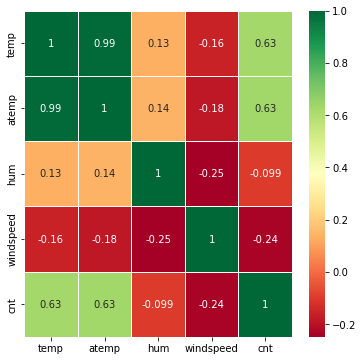

In [32]:
#verifying correlation of the parameters by heatmap
plt.figure(figsize=(6,6))
ax=sns.heatmap(Bike_num.corr(), annot=True, cmap='RdYlGn', linewidth=1)

There is linear relationship between temp and atemp, there is somekind of multicolinearity due to whcih both of the parameters cannot be used.

# Data Preparation

1. Dummy Variable creation

In [33]:
#Season
season = pd.get_dummies(Bike['season'], drop_first=True)
season.head()

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [34]:
#Here we will get dummies for weather
weather = pd.get_dummies(Bike['weathersit'], drop_first=True)
weather.head()

,Light Rain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [35]:
#Here we will get dummies for Month
month = pd.get_dummies(Bike['mnth'], drop_first=True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [36]:
#Here wew will get dummies for Weekday
weekday=pd.get_dummies(Bike['weekday'], drop_first=True)
weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


2. Merging the dataframe

In [37]:
Bike_1=pd.concat([Bike, season, month, weather, weekday], axis=1)
Bike_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light Rain,Misty,Mon,Sat,Sun,Thu,Tue,Wed
0,W1_Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,W1_Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,W1_Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,W1_Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,W1_Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [38]:
Bike_1.shape

(730, 34)

In [39]:
Bike_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  W2_Summer   730 non-null    uint8  
 13  W3_Fall     730 non-null    uint8  
 14  W4_Winter   730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

3. Removing columns which are not required

In [40]:
Bike_1.drop(['season', 'mnth','weathersit', 'weekday'], axis=1, inplace=True)
Bike_1.shape

(730, 30)

In [41]:
Bike_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   W2_Summer   730 non-null    uint8  
 9   W3_Fall     730 non-null    uint8  
 10  W4_Winter   730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  Jul         730 non-null    uint8  
 16  Jun         730 non-null    uint8  
 17  Mar         730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  Nov         730 non-null    u

# Spliting data for train and test dataset

1. Train and Test

In [42]:
#Need to specify random state so that train and test has same rows
np.random.seed(0)
Bike_train, Bike_test = train_test_split(Bike_1, train_size=0.7, test_size=0.3, random_state = 333)

verifying train-test split with new set of dataframes

In [43]:
Bike_train.shape

(510, 30)

In [44]:
Bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light Rain,Misty,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,20.222164,23.594534,62.311249,12.755513,4499.627451,0.247059,0.262745,...,0.084314,0.082353,0.025490,0.341176,0.139216,0.150980,0.143137,0.129412,0.141176,0.150980
std,0.500487,0.151726,0.466018,7.498761,8.137295,14.410726,5.208598,1949.447686,0.431725,0.440557,...,0.278131,0.275172,0.157763,0.474570,0.346511,0.358381,0.350557,0.335985,0.348545,0.358381
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717923,16.744800,51.604150,9.000663,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.212850,12.083316,4510.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327088,72.947900,15.614484,5983.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
Bike_test.shape

(219, 30)

In [46]:
Bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light Rain,Misty,Mon,Sat,Sun,Thu,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,20.561863,24.047735,63.772104,12.768098,4532.182648,0.264840,0.246575,...,0.086758,0.082192,0.036530,0.324201,0.155251,0.127854,0.146119,0.173516,0.146119,0.118721
std,0.501098,0.198967,0.465607,7.550239,8.206161,13.817867,5.185435,1911.832231,0.442259,0.432005,...,0.282125,0.275286,0.188034,0.469148,0.362974,0.334692,0.354034,0.379560,0.354034,0.324202
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.153918,17.210000,53.229200,9.062587,3192.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.773347,24.873150,63.750000,12.166932,4592.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.145403,30.966450,73.375000,15.660647,5905.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Conclusion: Based on 70-30 rule we got 510 rows in train and 220 rows in test.

2. Rescaling

In [47]:
#Using  MinMaxscaler
scaler=MinMaxScaler()

In [48]:
Bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light Rain,Misty,Mon,Sat,Sun,Thu,Tue,Wed
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,1,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,1,0,0,1,0,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
#Apply scaler
num_vars = ['temp','atemp','hum','windspeed','cnt']
Bike_train[num_vars] = scaler.fit_transform(Bike_train[num_vars])

In [50]:
#After applying scaler
Bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light Rain,Misty,Mon,Sat,Sun,Thu,Tue,Wed
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,1,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,0,0,1,0,0,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,1,0,0,0


3. Checking Correlation coefficient

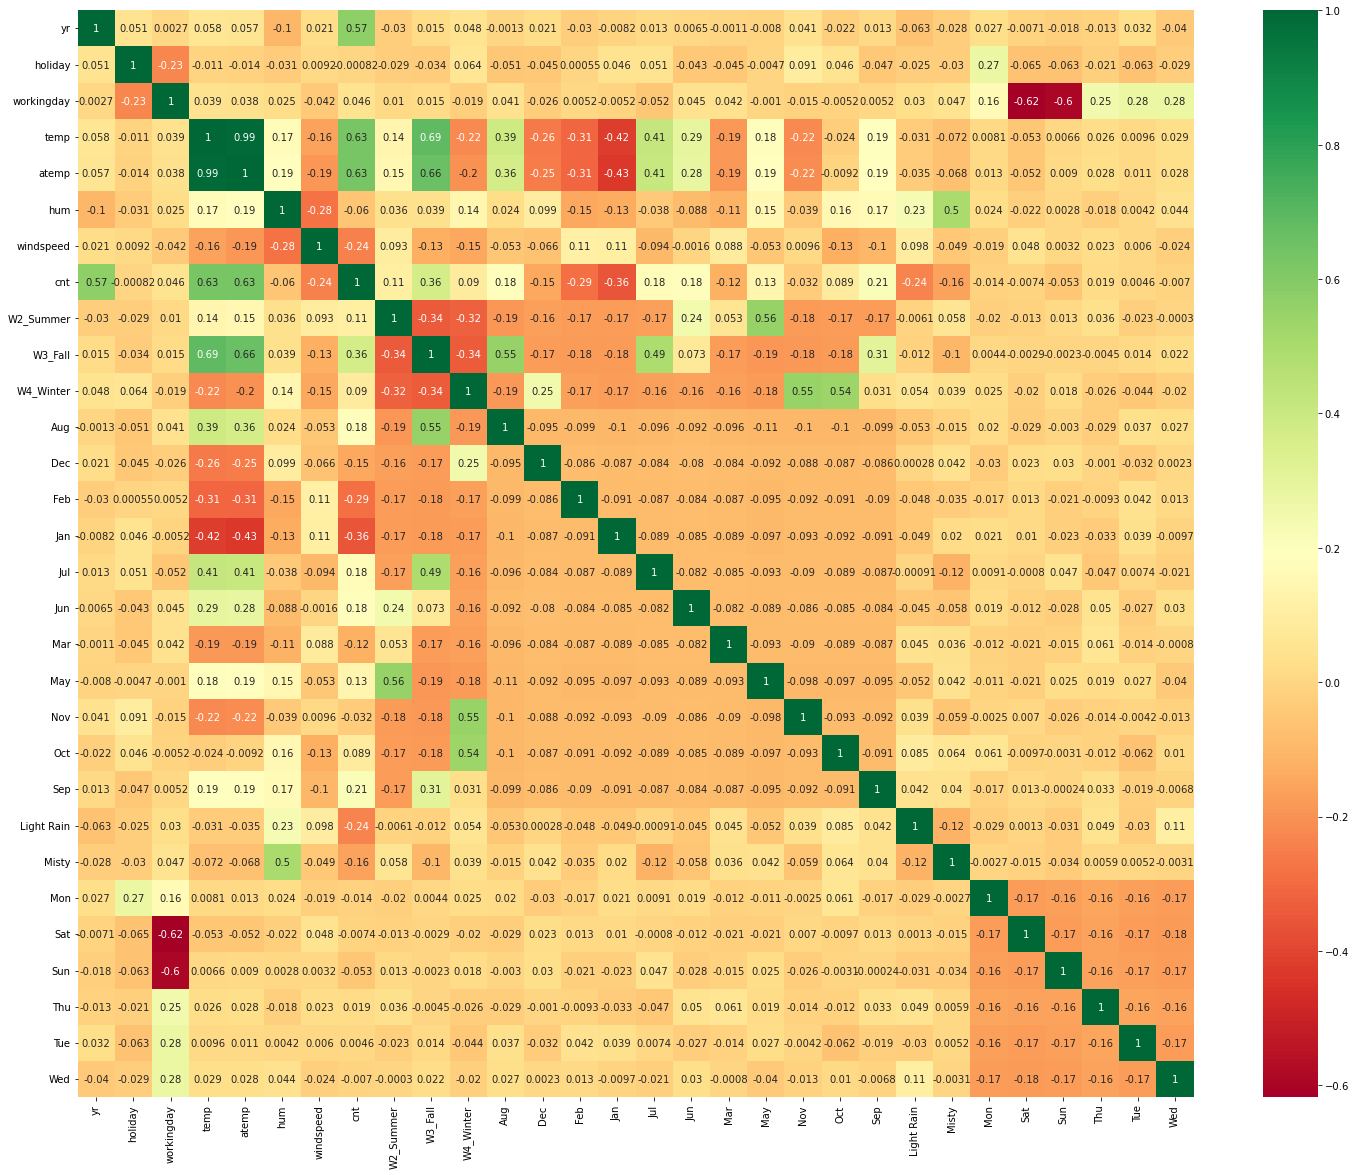

In [51]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(Bike_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

Notes:
1. temp and atemp has very high correlation with value of 0.99. We need to use only one of variables.
2. working day variables has high negative correlation.
3. temp and atemp has very strong correlation with cnt
4. months and corresponding weather has correlation.

# Building Linear Model

1. Divide into X_train and y_train

In [52]:
y_train=Bike_train.pop('cnt')
X_train=Bike_train

2. Recursive feature elimination

In [53]:
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe=RFE(lm,15)
rfe=rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 9),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 6),
 ('Feb', False, 10),
 ('Jan', False, 7),
 ('Jul', False, 2),
 ('Jun', False, 11),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', False, 5),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Light Rain', True, 1),
 ('Misty', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 15)]

In [55]:
#storing the selected 15 variables in list
col=X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'W2_Summer',
       'W3_Fall', 'W4_Winter', 'Mar', 'Oct', 'Sep', 'Light Rain', 'Misty',
       'Sat'],
      dtype='object')

In [56]:
#checking for eleminated columns
X_train.columns[~rfe.support_]

Index(['holiday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'May', 'Nov',
       'Mon', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [57]:
#Creating Dataframe for X_train with RFE selected variables
#Model1
X_train_rfe = X_train[col]

3. Model Development using statsmodel (Manual)

In [58]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [59]:
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,384.22
3,atemp,363.12
4,hum,17.52
7,W3_Fall,7.09
5,windspeed,4.71
1,workingday,4.61
6,W2_Summer,3.54
8,W4_Winter,3.01
13,Misty,2.14
0,yr,2.02


In [60]:
#Add a constant
X_train_lm1=sm.add_constant(X_train_rfe)
#Fitted the model
lr1=sm.OLS(y_train, X_train_lm1).fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.28e-186
Time:                        22:07:36   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1953      0.030      6.576      0.0

In [61]:
#Model2
X_train_new=X_train_rfe.drop(['atemp'], axis=1)

In [62]:
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,23.21
3,hum,17.23
6,W3_Fall,7.01
1,workingday,4.60
4,windspeed,4.55
5,W2_Summer,3.54
7,W4_Winter,3.01
12,Misty,2.14
0,yr,2.02
13,Sat,1.79


In [63]:
#Add a constant
X_train_lm2=sm.add_constant(X_train_new)
#Fitted the model
lr2=sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.00e-187
Time:                        22:07:38   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1962      0.030      6.627      0.0

In [64]:
#Model3
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.81
5,W3_Fall,6.75
3,windspeed,4.27
1,workingday,4.11
4,W2_Summer,3.51
6,W4_Winter,2.89
0,yr,2.02
8,Oct,1.66
12,Sat,1.66
11,Misty,1.54


In [66]:
#Add a constant
X_train_lm3=sm.add_constant(X_train_new)
#Fitted the model
lr3=sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          4.52e-184
Time:                        20:25:31   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0916      0.020      4.509      0.0

In [65]:
#Model 4 Remove W3_Fall as it has high VIF
X_train_new = X_train_new.drop(["W3_Fall"], axis = 1)

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.07
0,yr,2.01
5,W4_Winter,1.98
11,Sat,1.66
7,Oct,1.63
4,W2_Summer,1.56
10,Misty,1.54
8,Sep,1.23


In [70]:
#Add a constant
X_train_lm4=sm.add_constant(X_train_new)
#Fitted the model
lr4=sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.56e-181
Time:                        20:29:46   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0767      0.020      3.775      0.0

In [66]:
#Model 5 Removing Oct as it has high p-value
X_train_new = X_train_new.drop(["Oct"], axis = 1)

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.80
3,windspeed,4.11
1,workingday,4.07
0,yr,2.00
10,Sat,1.66
4,W2_Summer,1.56
9,Misty,1.53
5,W4_Winter,1.41
7,Sep,1.20
6,Mar,1.15


In [73]:
#Add a constant
X_train_lm5=sm.add_constant(X_train_new)
#Fitted the model
lr5=sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.39e-181
Time:                        20:31:51   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0742      0.020      3.640      0.0

In [67]:
#Model 6 removing Mar as it has high P-value
X_train_new = X_train_new.drop(["Mar"], axis = 1)

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
9,Sat,1.65
4,W2_Summer,1.56
8,Misty,1.52
5,W4_Winter,1.38
6,Sep,1.20
7,Light Rain,1.07


In [76]:
#Add a constant
X_train_lm6=sm.add_constant(X_train_new)
#Fitted the model
lr6=sm.OLS(y_train, X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          3.77e-181
Time:                        20:33:49   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0841      0.020      4.168      0.0

Conclusion: This model looks good as it seems it has low multicollinearity. We will consider this model as our final model.

# Model Interpretation

#Hypothesis testing states that H0:B1=B2...Bn=0, H1: at least Bi!=0
#lr6 model coefficients
#const          0.0841      
#yr             0.2308      
#workingday     0.0432      
#temp           0.5636      
#windspeed     -0.1552      
#W2_Summer      0.0827      
#W4_Winter      0.1287      
#Sep            0.0947      
#Light Rain    -0.3070      
#Misty         -0.0748      
#Sat            0.0569

With this we can say that none to coefficient is not equal to zero hence we can reject the null Hypothesis.

F-Statistic value is 233 whic is greater than 1 and p-value of ~0.00 states that the overall model is significant.

Interpretation:
constant: Value of 0.0841 indicated that, in the absencec of all other predictor variables.
yr: Value of 0.2308 indicated that a unit increase in year variable.
workingday: Value of 0.0432 indicated tha a unit increase in working day variable increases the bike rental numbers.
temp: Value of 0.5636 indicated that increase in temperature will increase in rental numbers.
windspeed: Value of -0.1552 indicated that a unit increase in windspeed variable reduces the bike rentals.
W2_summer: Value of 0.0827 indicates that a unit increase in summer reduces rental bike numbers.
W4_winter: Value of 0.1287 indicates that a unit increase in winter increases rental bike numbers.
Sep: Value of 0.0947 indicates that a unit increase in sep increases rental bike numbers.
Light Rain: Value of -0.3070 indicates unit increase in Light rain reduce the rental bike numbers.
Mist: Value of 0.0748 indicates unit increase in misty weather reduces the bike rental numbers.
Sat: Value of 0.0569 indicates unit increase in sat increases the bike rental numbers.

# Model Validation

Linear relationship

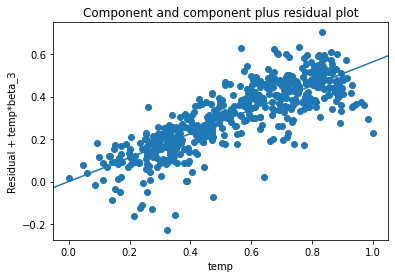

In [82]:
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

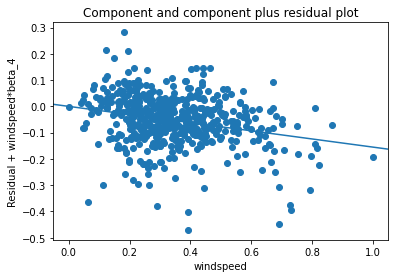

In [83]:
sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

Conclusion: With above we can see relationship between model and predictor. We can see linear regression is well preserved.

Homoscedasticity

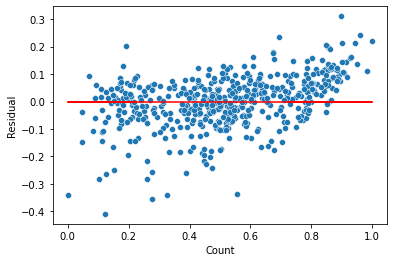

In [86]:
y_train_pred=lr6.predict(X_train_lm6)
residual=y_train-y_train_pred
sns.scatterplot(y_train, residual)
plt.plot(y_train, (y_train-y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Homoscedacity is well preserved as there is no visible pattern in residual values.

No Multicolinearity

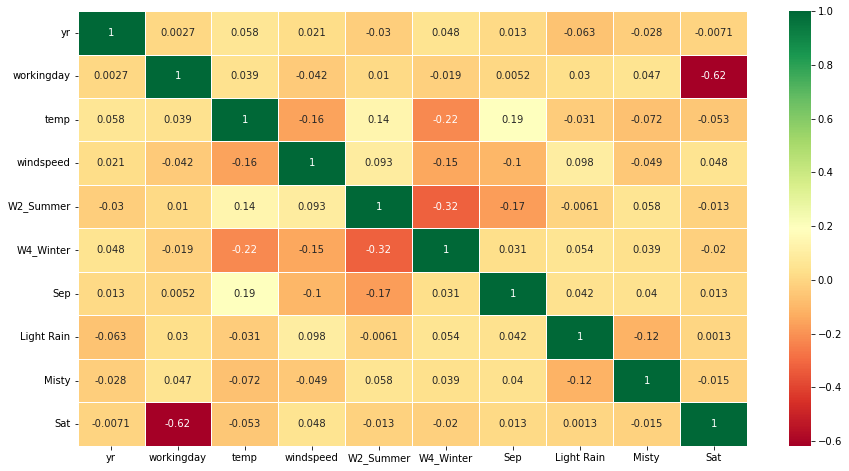

In [87]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(), annot=True, cmap='RdYlGn', linewidth=1)
plt.show()

Normality of error

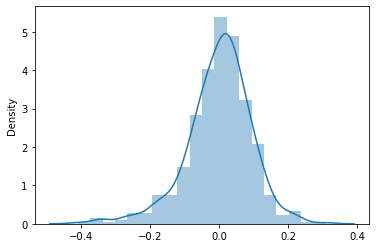

In [90]:
res=y_train-y_train_pred
#Histogram plot
sns.distplot((res), bins=20)
plt.show()

Conclusion: Based on Histogram plot that error terms are following a normal distribution

# Making Predictions using final model

Scaling

In [94]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
Bike_test[num_vars] = scaler.transform(Bike_test[num_vars])
Bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light Rain,Misty,Mon,Sat,Sun,Thu,Tue,Wed
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,1,0,0,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,1,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,1,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,0,1,0


In [96]:
Bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light Rain,Misty,Mon,Sat,Sun,Thu,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.086758,0.082192,0.036530,0.324201,0.155251,0.127854,0.146119,0.173516,0.146119,0.118721
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.282125,0.275286,0.188034,0.469148,0.362974,0.334692,0.354034,0.379560,0.354034,0.324202
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing X_test and y_test

In [97]:
y_test=Bike_test.pop('cnt')
X_test=Bike_test

In [98]:
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   windspeed   219 non-null    float64
 5   W2_Summer   219 non-null    uint8  
 6   W4_Winter   219 non-null    uint8  
 7   Sep         219 non-null    uint8  
 8   Light Rain  219 non-null    uint8  
 9   Misty       219 non-null    uint8  
 10  Sat         219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [99]:
#Making prediction
y_pred = lr6.predict(X_test_lm6)

# Model Evaluation

Text(0, 0.5, 'y_pred')

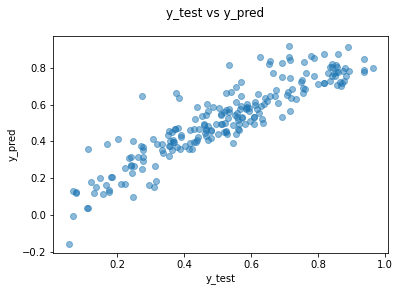

In [100]:
#plotting y_test and y_pred
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')

R^2 Value Calculation for Bike_test

In [103]:
r2=round(r2_score(y_test, y_pred), 4)
r2

0.8203

Adjusted R^2 Value Calculation

In [104]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8117

Model Train and Test R2 Statistics
R2Value Train Dataset is 82.0% and test data set is 82%
Adjusted R2 Value  for Train Dataset is 81.1% and Test Dataset is 81%

Calculating RMSE for the selected model

In [110]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)), 4)
RMSE

0.093

Calculating Mean absolute Error for the selected model

In [111]:
MAE=round(mean_absolute_error(y_test, y_pred), 4)
MAE

0.0714

RMSE error value is 0.093 and MAE (mean absolute error) is 0.0714, this indicates that the momdel is really good.

Outcome of the model:
1. Temperature (Temp): A coefficient value of 0.5636 indicated that a templ has significant impact on rental of Bikes.
2. Light Rain: A coefficient value of -0.3070 light rain and snow weather decresed the rental of Bikes.
3. Year (yr): A coefficient value of 0.2308 indicated that a year wise bike rentals increase yearly.